In [115]:
from init import *

In [116]:
pass_icir_factor = ['liq_turn_avg','mmt_normal_M','ccr_mrq','dp_ttm','apr_mrq','mmt_overmight_M','ffoa_ttm','dpr','ep_mrq,np_parent_mrq','liq_zamount,corr_price_turn']

factor_dict = pd.read_pickle('factor_dict_final.pkl')
ic_df = pd.read_pickle('ic_df_final.pkl')[pass_icir_factor]

In [118]:
def ic_analysis(ic_df):
    return pd.concat([ic_df.mean().to_frame('IC'),(ic_df.mean()/ic_df.std()).to_frame('IR')],axis = 1)

compare = ic_analysis(ic_df).sort_values(by = 'IR',ascending=False)
compare

,IC,IR
"liq_zamount,corr_price_turn",0.070752,1.081208
liq_turn_avg,0.095730,0.910500
"ep_mrq,np_parent_mrq",0.057958,0.765147
dp_ttm,0.035603,0.596828
mmt_overmight_M,0.031321,0.586942
mmt_normal_M,0.054143,0.540213
ccr_mrq,0.019297,0.426976
ffoa_ttm,0.011825,0.269553
apr_mrq,0.007828,0.239547
dpr,0.006679,0.170375


In [119]:
pass_icir_factor = compare[compare.IR > 0.3].index.tolist()

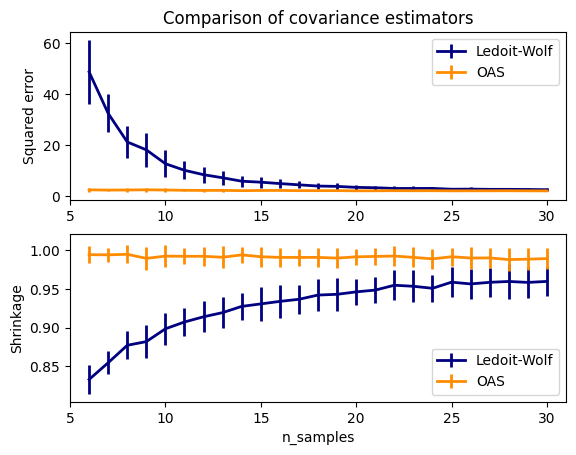

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz, cholesky  # 获取半正定矩阵及Cholesky分解

from sklearn.covariance import LedoitWolf, OAS   # 导入LedoitWolf压缩和OAS压缩

np.random.seed(0)
n_features = 100
# simulation covariance matrix (AR(1) process)
r = 0.1
real_cov = toeplitz(r ** np.arange(n_features))
coloring_matrix = cholesky(real_cov)

n_samples_range = np.arange(6, 31, 1)
repeat = 100
lw_mse = np.zeros((n_samples_range.size, repeat))
oa_mse = np.zeros((n_samples_range.size, repeat))
lw_shrinkage = np.zeros((n_samples_range.size, repeat))
oa_shrinkage = np.zeros((n_samples_range.size, repeat))
for i, n_samples in enumerate(n_samples_range):
    for j in range(repeat):
        X = np.dot(
            np.random.normal(size=(n_samples, n_features)), coloring_matrix.T)

        lw = LedoitWolf(store_precision=False, assume_centered=True)
        lw.fit(X)
        lw_mse[i, j] = lw.error_norm(real_cov, scaling=False)
        lw_shrinkage[i, j] = lw.shrinkage_

        oa = OAS(store_precision=False, assume_centered=True)
        oa.fit(X)
        oa_mse[i, j] = oa.error_norm(real_cov, scaling=False)
        oa_shrinkage[i, j] = oa.shrinkage_

# plot MSE
plt.subplot(2, 1, 1)
plt.errorbar(n_samples_range, lw_mse.mean(1), yerr=lw_mse.std(1),
             label='Ledoit-Wolf', color='navy', lw=2)
plt.errorbar(n_samples_range, oa_mse.mean(1), yerr=oa_mse.std(1),
             label='OAS', color='darkorange', lw=2)
plt.ylabel("Squared error")
plt.legend(loc="upper right")
plt.title("Comparison of covariance estimators")
plt.xlim(5, 31)

# plot shrinkage coefficient
plt.subplot(2, 1, 2)
plt.errorbar(n_samples_range, lw_shrinkage.mean(1), yerr=lw_shrinkage.std(1),
             label='Ledoit-Wolf', color='navy', lw=2)
plt.errorbar(n_samples_range, oa_shrinkage.mean(1), yerr=oa_shrinkage.std(1),
             label='OAS', color='darkorange', lw=2)
plt.xlabel("n_samples")
plt.ylabel("Shrinkage")
plt.legend(loc="lower right")
plt.ylim(plt.ylim()[0], 1. + (plt.ylim()[1] - plt.ylim()[0]) / 10.)
plt.xlim(5, 31)

plt.show()


In [81]:
pd.DataFrame(OAS().fit(ic_df).covariance_,index = pass_icir_factor,columns=pass_icir_factor)

,liq_turn_avg,mmt_normal_M,ccr_mrq,dp_ttm,apr_mrq,mmt_overmight_M,ffoa_ttm,dpr,"ep_mrq,np_parent_mrq","liq_zamount,corr_price_turn"
liq_turn_avg,0.011013,0.001008,0.001304,0.003216,0.000887,0.001706,0.001155,0.000178,0.002822,0.002275
mmt_normal_M,0.001008,0.010010,-0.000322,0.000096,-0.000333,-0.001456,-0.000779,-0.000748,-0.000860,0.003578
ccr_mrq,0.001304,-0.000322,0.002054,0.001281,0.000777,0.000494,0.001009,0.000223,0.001928,0.000233
dp_ttm,0.003216,0.000096,0.001281,0.003561,0.000682,0.000452,0.001156,0.000105,0.002639,0.000311
apr_mrq,0.000887,-0.000333,0.000777,0.000682,0.001085,0.000108,0.000513,0.000193,0.000643,-0.000053
mmt_overmight_M,0.001706,-0.001456,0.000494,0.000452,0.000108,0.002854,0.000129,-0.000092,0.000718,0.000428
ffoa_ttm,0.001155,-0.000779,0.001009,0.001156,0.000513,0.000129,0.001937,0.000381,0.001703,-0.000427
dpr,0.000178,-0.000748,0.000223,0.000105,0.000193,-0.000092,0.000381,0.001551,0.000679,-0.000492
"ep_mrq,np_parent_mrq",0.002822,-0.000860,0.001928,0.002639,0.000643,0.000718,0.001703,0.000679,0.005727,0.000541
"liq_zamount,corr_price_turn",0.002275,0.003578,0.000233,0.000311,-0.000053,0.000428,-0.000427,-0.000492,0.000541,0.004280


In [82]:
pd.DataFrame(LedoitWolf().fit(ic_df).covariance_,index = pass_icir_factor,columns=pass_icir_factor)

,liq_turn_avg,mmt_normal_M,ccr_mrq,dp_ttm,apr_mrq,mmt_overmight_M,ffoa_ttm,dpr,"ep_mrq,np_parent_mrq","liq_zamount,corr_price_turn"
liq_turn_avg,0.011012,0.001008,0.001304,0.003216,0.000887,0.001705,0.001155,0.000178,0.002821,0.002274
mmt_normal_M,0.001008,0.010009,-0.000322,0.000096,-0.000333,-0.001455,-0.000779,-0.000748,-0.000860,0.003578
ccr_mrq,0.001304,-0.000322,0.002054,0.001280,0.000777,0.000494,0.001009,0.000223,0.001928,0.000233
dp_ttm,0.003216,0.000096,0.001280,0.003561,0.000682,0.000452,0.001156,0.000105,0.002639,0.000311
apr_mrq,0.000887,-0.000333,0.000777,0.000682,0.001085,0.000108,0.000512,0.000193,0.000642,-0.000053
mmt_overmight_M,0.001705,-0.001455,0.000494,0.000452,0.000108,0.002855,0.000129,-0.000092,0.000718,0.000428
ffoa_ttm,0.001155,-0.000779,0.001009,0.001156,0.000512,0.000129,0.001937,0.000381,0.001703,-0.000427
dpr,0.000178,-0.000748,0.000223,0.000105,0.000193,-0.000092,0.000381,0.001552,0.000679,-0.000492
"ep_mrq,np_parent_mrq",0.002821,-0.000860,0.001928,0.002639,0.000642,0.000718,0.001703,0.000679,0.005727,0.000540
"liq_zamount,corr_price_turn",0.002274,0.003578,0.000233,0.000311,-0.000053,0.000428,-0.000427,-0.000492,0.000540,0.004280


In [83]:
ic_df.corr()

,liq_turn_avg,mmt_normal_M,ccr_mrq,dp_ttm,apr_mrq,mmt_overmight_M,ffoa_ttm,dpr,"ep_mrq,np_parent_mrq","liq_zamount,corr_price_turn"
liq_turn_avg,1.000000,0.096198,0.276107,0.515851,0.259609,0.305761,0.251942,0.043527,0.356385,0.332533
mmt_normal_M,0.096198,1.000000,-0.071529,0.016218,-0.102325,-0.273762,-0.178312,-0.191405,-0.113897,0.548789
ccr_mrq,0.276107,-0.071529,1.000000,0.477775,0.529026,0.205949,0.511796,0.126670,0.566641,0.079283
dp_ttm,0.515851,0.016218,0.477775,1.000000,0.352092,0.142875,0.444225,0.045170,0.587429,0.080101
apr_mrq,0.259609,-0.102325,0.529026,0.352092,1.000000,0.062219,0.359643,0.151259,0.261105,-0.025161
mmt_overmight_M,0.305761,-0.273762,0.205949,0.142875,0.062219,1.000000,0.055616,-0.044022,0.178740,0.123233
ffoa_ttm,0.251942,-0.178312,0.511796,0.444225,0.359643,0.055616,1.000000,0.222656,0.515598,-0.149554
dpr,0.043527,-0.191405,0.126670,0.045170,0.151259,-0.044022,0.222656,1.000000,0.230053,-0.192839
"ep_mrq,np_parent_mrq",0.356385,-0.113897,0.566641,0.587429,0.261105,0.178740,0.515598,0.230053,1.000000,0.109684
"liq_zamount,corr_price_turn",0.332533,0.548789,0.079283,0.080101,-0.025161,0.123233,-0.149554,-0.192839,0.109684,1.000000


#### 最大化动态ICIR加权_压缩矩阵

In [120]:
# 最大化动态ICIR加权(压缩矩阵)

import numpy as np
from scipy.optimize import minimize

def maxir_weight(Ic_df_r,cov_matrix):
    # 定义目标函数
    def objective(x):
        return -(x.dot(np.array(Ic_df_r)))/(np.sqrt(x.dot(cov_matrix).dot(x.transpose())))

    # 定义初始值
    x0 = np.array([[1]*Ic_df_r.shape[0]])

    # 求解优化问题
    result = minimize(objective,x0,method='SLSQP',bounds=[[0,None]]*Ic_df_r.shape[0])

    # 输出结果
    return result.x


def weight_icir_max_compressed_matrix(Factor_dict,Ic_df,traget_ic = 'ic',rolling_T = 240):

    """
    :param Factor_dict: 全部因子字典 -> dict
    :param Ic_df: 全部因子IC表 -> DataFrame
    :param traget: 权重目标选填,默认ic -> 'ic','ir'
    :return Factor_dict: 加权后全部因子字典 -> dict
    """
    # ICIR加权滚动240期均值
    if (traget_ic == 'ic') | (traget_ic == 'IC'):
        Ic_df_r = Ic_df.rolling(rolling_T).mean().dropna(how = 'all')
    else:
        Ic_df_r = (Ic_df.rolling(rolling_T).mean()/Ic_df.rolling(rolling_T).std()).dropna(how = 'all')
    
    factor_names = Ic_df_r.columns.tolist()     # 因子名
    date_list = Ic_df_r.index.tolist()          # 因子值
    weight = pd.DataFrame()                     # 权重

    for date in tqdm(date_list):
        temp = pd.DataFrame()
        for i in factor_names:
            temp = pd.concat([temp,pd.DataFrame(Factor_dict[i].loc[date].to_frame(i))],axis = 1)
        temp.dropna(inplace=True)
        v = LedoitWolf().fit(temp).covariance_             # 构建因子值协方差矩阵  # LedoitWolf # OAS
        weight_temp = maxir_weight(Ic_df_r.loc[date],v)                        # 计算权重
        weight_temp = pd.DataFrame(weight_temp,index = factor_names,columns = [date])
        weight = pd.concat([weight,weight_temp],axis = 1)
    weight = weight.T
    
    # 赋权
    for i in factor_names:
        Factor_dict[i] = Factor_dict[i].mul(weight[i],axis = 0).dropna(how = 'all')

    #return Factor_dict,weight
    
    # 因子合成
    conbime_icir_max_compressed_matrix = pd.DataFrame()
    for i in factor_names:
        conbime_icir_max_compressed_matrix = conbime_icir_max_compressed_matrix.add(Factor_dict[i],fill_value = 0)
    
    conbime_icir_max_compressed_matrix = conbime_icir_max_compressed_matrix.sub(conbime_icir_max_compressed_matrix.mean(axis=1), axis=0).div(conbime_icir_max_compressed_matrix.std(axis=1), axis=0)

    return conbime_icir_max_compressed_matrix,weight

In [121]:
factor_dict = pd.read_pickle('factor_dict_final.pkl')
ic_df = pd.read_pickle('ic_df_final.pkl')[pass_icir_factor]

conbime_icir_max_compressed_matrix,weight = weight_icir_max_compressed_matrix(factor_dict,ic_df,traget_ic = 'ic',rolling_T = 120)

100%|██████████| 1662/1662 [00:34<00:00, 47.92it/s]


In [122]:
a,b = Quick_Factor_Return_N_IC(conbime_icir_max_compressed_matrix,20,'conbime_icir_max_compressed_matrix')

{'name': 'conbime_icir_max_compressed_matrix', 'IC mean': 0.1171, 'IC std': 0.0903, 'IR': 1.2966, 'IR_ly': 1.2265, 'IC>0': 0.8837, 'ABS_IC>2%': 0.9294, 't_stat': 52.5422}


<AxesSubplot: >

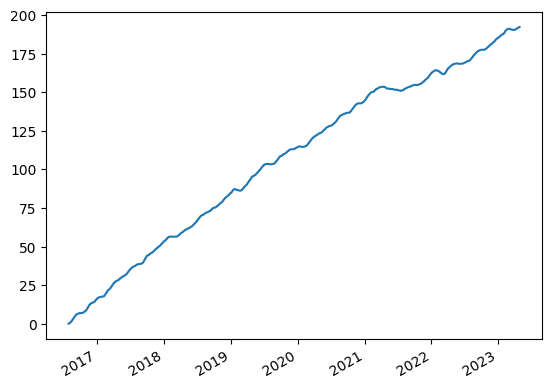

In [123]:
a.cumsum().plot()

#### 最大化动态ICIR加权_IC值

In [125]:
def weight_icir_max_ic_cov_matrix(Factor_dict,Ic_df,traget_ic = 'ic',rolling_T = 240):

    """
    :param Factor_dict: 全部因子字典 -> dict
    :param Ic_df: 全部因子IC表 -> DataFrame
    :param traget: 权重目标选填,默认ic -> 'ic','ir'
    :return Factor_dict: 加权后全部因子字典 -> dict
    """
    # ICIR加权滚动240期均值
    if (traget_ic == 'ic') | (traget_ic == 'IC'):
        Ic_df_r = Ic_df.rolling(rolling_T).mean().dropna(how = 'all')
    else:
        Ic_df_r = (Ic_df.rolling(rolling_T).mean()/Ic_df.rolling(rolling_T).std()).dropna(how = 'all')
    
    factor_names = Ic_df_r.columns.tolist()     # 因子名
    date_list = Ic_df_r.index.tolist()          # 因子值
    weight = pd.DataFrame()                     # 权重
    
    for date in tqdm(date_list):
        temp = pd.DataFrame()
        for i in factor_names:
            temp = Ic_df.loc[get_previous_trading_date(date,rolling_T-1):date]

        v = temp.cov()
        weight_temp = np.dot(np.linalg.inv(np.array(v)), np.array([np.nanmean(Ic_df_r[i].loc[date]) for i in factor_names]))
        weight_temp = pd.DataFrame(weight_temp,index = factor_names,columns = [date])
        weight = pd.concat([weight,weight_temp],axis = 1)
    weight = weight.T
    
    # 赋权
    for i in factor_names:
        Factor_dict[i] = Factor_dict[i].mul(weight[i],axis = 0).dropna(how = 'all')
    
    # 因子合成
    conbime_icir_max_cov_matrix = pd.DataFrame()
    for i in factor_names:
        conbime_icir_max_cov_matrix = conbime_icir_max_cov_matrix.add(Factor_dict[i],fill_value = 0)
    
    conbime_icir_max_cov_matrix = conbime_icir_max_cov_matrix.sub(conbime_icir_max_cov_matrix.mean(axis=1), axis=0).div(conbime_icir_max_cov_matrix.std(axis=1), axis=0)

    return conbime_icir_max_cov_matrix,weight

In [126]:
factor_dict = pd.read_pickle('factor_dict_final.pkl')
ic_df = pd.read_pickle('ic_df_final.pkl')[pass_icir_factor]

weight_icir_max_ic_cov,weight = weight_icir_max_ic_cov_matrix(factor_dict,ic_df,traget_ic = 'ic',rolling_T = 120)

100%|██████████| 1662/1662 [00:17<00:00, 94.17it/s]


In [128]:
a,b = Quick_Factor_Return_N_IC(weight_icir_max_ic_cov,20,'weight_icir_max_ic_cov')

{'name': 'weight_icir_max_ic_cov', 'IC mean': 0.0714, 'IC std': 0.0468, 'IR': 1.5235, 'IR_ly': 1.7693, 'IC>0': 0.9391, 'ABS_IC>2%': 0.8886, 't_stat': 61.7364}


<AxesSubplot: >

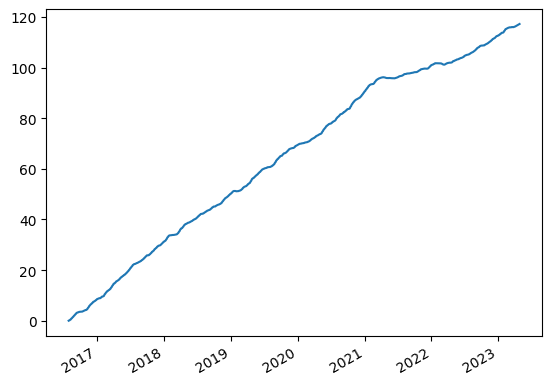

In [129]:
a.cumsum().plot()

#### 最大化动态ICIR加权_因子值

In [130]:
# 最大化动态ICIR加权
def weight_icir_max_value_cov_matrix(Factor_dict,Ic_df,traget_ic = 'ic',rolling_T = 240):

    """
    :param Factor_dict: 全部因子字典 -> dict
    :param Ic_df: 全部因子IC表 -> DataFrame
    :param traget: 权重目标选填,默认ic -> 'ic','ir'
    :return Factor_dict: 加权后全部因子字典 -> dict
    """
    # ICIR加权滚动240期均值
    if (traget_ic == 'ic') | (traget_ic == 'IC'):
        Ic_df_r = Ic_df.rolling(rolling_T).mean().dropna(how = 'all')
    else:
        Ic_df_r = (Ic_df.rolling(rolling_T).mean()/Ic_df.rolling(rolling_T).std()).dropna(how = 'all')
    
    factor_names = Ic_df_r.columns.tolist()     # 因子名
    date_list = Ic_df_r.index.tolist()          # 因子值
    weight = pd.DataFrame()                     # 权重
    
    for date in tqdm(date_list):
        temp = pd.DataFrame()
        for i in factor_names:
            temp = pd.concat([temp,pd.DataFrame(Factor_dict[i].loc[date].to_frame(i))],axis = 1) 
        v = temp.cov()                          # 构建因子值协方差矩阵    
        weight_temp = np.dot(np.linalg.inv(np.array(v)), np.array([np.nanmean(Ic_df_r[i].loc[date]) for i in factor_names]))                         # 计算权重
        weight_temp = pd.DataFrame(weight_temp,index = factor_names,columns = [date])
        weight = pd.concat([weight,weight_temp],axis = 1)
    weight = weight.T
    
    # 赋权
    for i in factor_names:
        Factor_dict[i] = Factor_dict[i].mul(weight[i],axis = 0).dropna(how = 'all')

    #return Factor_dict,weight
    
    # 因子合成
    conbime_icir_max = pd.DataFrame()
    for i in factor_names:
        conbime_icir_max = conbime_icir_max.add(Factor_dict[i],fill_value = 0)
    
    conbime_icir_max = conbime_icir_max.sub(conbime_icir_max.mean(axis=1), axis=0).div(conbime_icir_max.std(axis=1), axis=0)

    return conbime_icir_max,weight


In [131]:
factor_dict = pd.read_pickle('factor_dict_final.pkl')
ic_df = pd.read_pickle('ic_df_final.pkl')[pass_icir_factor]

weight_icir_max_value_cov,weight  = weight_icir_max_value_cov_matrix(factor_dict,ic_df,traget_ic = 'ic',rolling_T = 120)

100%|██████████| 1662/1662 [00:31<00:00, 52.09it/s]


In [132]:
a,b = Quick_Factor_Return_N_IC(weight_icir_max_value_cov,20,'weight_icir_max_value_cov')

{'name': 'weight_icir_max_value_cov', 'IC mean': 0.1167, 'IC std': 0.089, 'IR': 1.3108, 'IR_ly': 1.2198, 'IC>0': 0.891, 'ABS_IC>2%': 0.9196, 't_stat': 53.1156}


<AxesSubplot: >

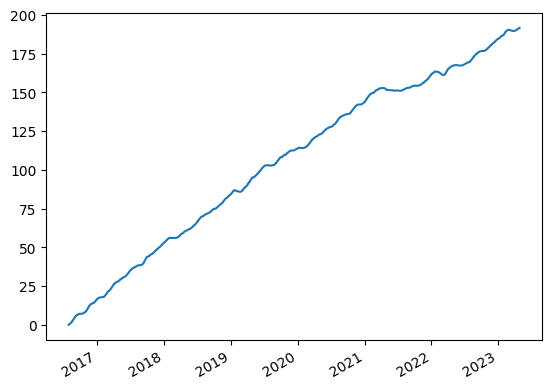

In [133]:
a.cumsum().plot()

#### 动态ICIR加权

In [143]:
ic_df

,"liq_zamount,corr_price_turn",liq_turn_avg,"ep_mrq,np_parent_mrq",dp_ttm,mmt_overmight_M,mmt_normal_M,ccr_mrq
datetime,,,,,,,
2016-02-01,-0.122469,0.110142,0.003645,0.020828,0.043152,0.024220,0.015291
2016-02-02,-0.100517,0.132132,0.000035,0.019030,0.072889,0.047776,0.017800
2016-02-03,-0.115784,0.150432,0.004447,0.012028,0.092883,0.046103,0.039909
2016-02-04,-0.124634,0.188069,0.019929,0.028002,0.131588,0.045859,0.045888
2016-02-05,-0.097593,0.146730,0.030533,0.035373,0.117311,0.067167,0.060873
...,...,...,...,...,...,...,...
2023-05-25,-0.049979,-0.042746,0.114815,0.048777,0.021883,-0.038491,0.005145
2023-05-26,-0.057882,-0.065849,0.106497,0.039955,0.005117,0.003814,0.016200
2023-05-29,-0.035754,-0.026841,0.096297,0.034793,0.012992,-0.000604,-0.006236


In [144]:
# 动态ICIR加权
def weigit_icir(Factor_dict,Ic_df,traget_ic = 'ic',rolling_T = 240):
    """
    :param Factor_dict: 全部因子字典 -> dict
    :param Ic_df: 全部因子IC表 -> DataFrame
    :param traget: 权重目标选填,默认ic -> 'ic','ir'
    :return Factor_dict: 加权后全部因子字典 -> dict
    """
    # ICIR加权滚动240期均值
    if (traget_ic == 'ic') | (traget_ic == 'IC'):
        Ic_df_r = Ic_df.rolling(rolling_T).mean().dropna(how = 'all')
    else:
        Ic_df_r = (Ic_df.rolling(rolling_T).mean()/Ic_df.rolling(rolling_T).std()).dropna(how = 'all')
    Ic_df_r.index.names = ['date']
    factor_names = Ic_df_r.columns.tolist()

    factor_df = pd.DataFrame()
    for i in tqdm(factor_names):
        factor_df = pd.concat([factor_df,Factor_dict[i].stack().to_frame(i)],axis = 1)
    factor_df.index.names = ['date','order_book_id']
    conime_icir = (factor_df * Ic_df_r).sum(axis = 1).unstack('order_book_id').sort_index()

    return conime_icir

In [145]:
conime_icir = weigit_icir(factor_dict,ic_df,traget_ic = 'ic',rolling_T = 120)

100%|██████████| 7/7 [00:43<00:00,  6.27s/it]


In [146]:
a,b = Quick_Factor_Return_N_IC(conime_icir,20,'conime_icir')

{'name': 'conime_icir', 'IC mean': 0.1142, 'IC std': 0.0915, 'IR': 1.2481, 'IR_ly': 1.2113, 'IC>0': 0.8819, 'ABS_IC>2%': 0.9245, 't_stat': 50.5755}


<AxesSubplot: xlabel='date'>

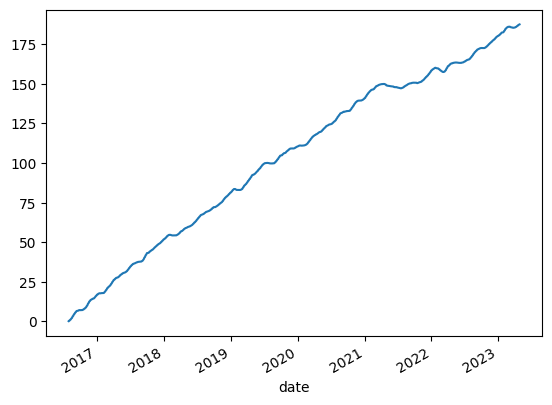

In [147]:
a.cumsum().plot()

#### 等权合成

In [150]:
combine_ew = pd.DataFrame()

for i in list(factor_dict.keys()):
    combine_ew = combine_ew.add(factor_dict[i],fill_value = 0)

In [151]:
a,b = Quick_Factor_Return_N_IC(combine_ew,20,'conime_icir')

{'name': 'conime_icir', 'IC mean': 0.0858, 'IC std': 0.0779, 'IR': 1.1015, 'IR_ly': 0.932, 'IC>0': 0.8681, 'ABS_IC>2%': 0.8916, 't_stat': 46.4871}


<AxesSubplot: >

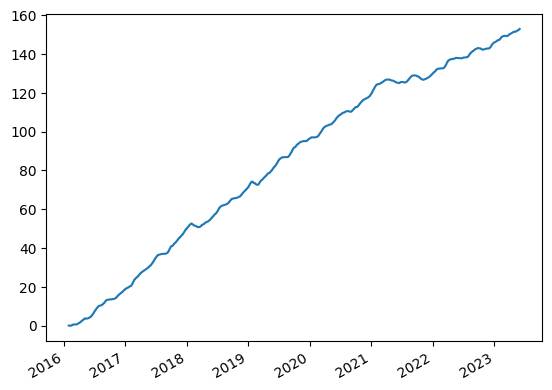

In [153]:
a.cumsum().plot()

#### 模型回测（含交易成本）

In [1]:
from init import *

In [2]:
BACKTEST?

Signature:
BACKTEST(
    df,
    name='',
    n=50,
    change_days=5,
    tax=0.001,
    commission=0.0002,
    benchmark='000906.XSHG',
    fix=False,
    limit_n=1,
    filter=False,
)
Docstring:
:param df: 因子值 -> unstack
:param name: 因子名称 -> str
:param n: 最多选取因子值最大的n只标的 -> int 
:param change_days: 调仓周期 -> int
:param tax: 印花税（默认千一） -> float
:param commission: 交易佣金（默认万二） -> int
:param benchmark: 基准 -> str
:param fix: 是否修正买入队列 -> bool
:param limit_n: 数据修正填充数量 -> int
:param filter: 是否过滤ST涨停停牌 -> bool
:return net: 净值序列 -> dataframe
:return performance: 绩效分析 -> dataframe
File:      c:\users\nick_ni\documents\nick_ni\courses\课程\专题课程\2. alpha因子专题\因子合成方法研究\init.py
Type:      function


100%|██████████| 83/83 [00:08<00:00,  9.41it/s]



 correlation: 0.7969761047197422


,净值,年化收益率,夏普比率,最大回测,波动率,日平均换手率
net,1.8071,9.92,0.30,39.42,22.85,0.07586
benchmark,0.9711,-0.47,-0.18,38.31,18.94,0.07586
alpha,1.8609,10.43,0.54,27.60,13.86,0.07586


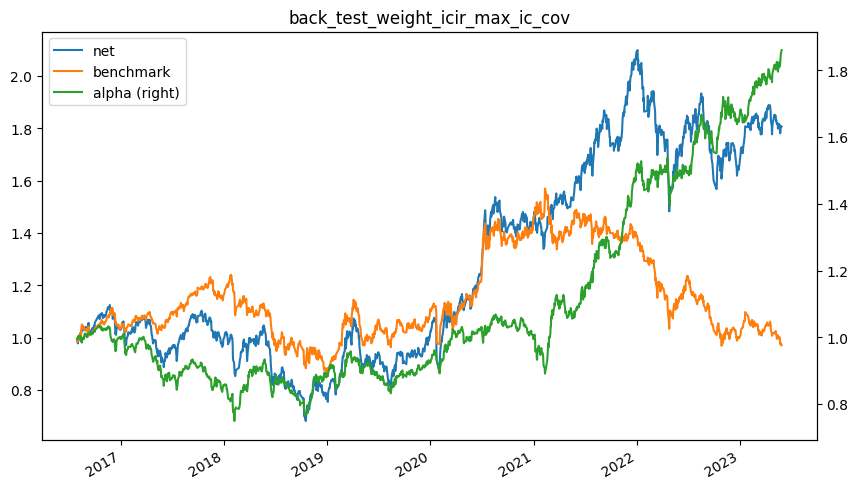

In [137]:
net,performance = BACKTEST(weight_icir_max_ic_cov,'weight_icir_max_ic_cov',n= 50,change_days = 20)
performance

In [139]:
net

,net,benchmark
2016-07-29,-0.010527,-0.007446
2016-08-01,-0.011692,-0.008788
2016-08-02,0.011772,0.003960
2016-08-03,0.007519,0.004337
2016-08-04,0.003296,0.004189
...,...,...
2023-05-23,-0.014838,-0.015491
2023-05-24,-0.003554,-0.011336
2023-05-25,0.003583,-0.001315
2023-05-26,0.011926,0.005384
